### 인식 가설(Recognition Hypothesis)의 대수학적 표현

인식 가설을 대수학적으로 표현하면 다음과 같이 나타낼 수 있다.

$  
P(O \mid H) = \sum_{i=1}^{n} w_i f_i(O, H)  
$

#### 각 요소 설명
- **$ P(O \mid H) $**: 주어진 가설 $ H $ 하에서 관찰된 데이터 $ O $가 나타날 확률  
- **$ w_i $**: 각 특징 $ f_i $의 가중치(학습된 모델 파라미터)  
- **$ f_i(O, H) $**: 가설 $ H $와 입력 $ O $의 관계를 나타내는 특징 함수(feature function)  
- **$ n $**: 전체 특징 개수  

이 수식은 주어진 입력 $ O $가 특정한 가설 $ H $와 얼마나 잘 맞는지를 결정하는 확률 모델을 의미한다. 머신러닝이나 패턴 인식에서 많이 사용되는 방식이다.


### 음향 모델의 수식 설명

음향 모델에서 최적의 단어 열을 찾는 과정은 다음과 같이 표현할 수 있다.

$  
\hat{w} = \arg\max P(X \mid w) P(w)  
$

#### 각 요소 설명
- **$ \hat{w} $**: 최적의 단어 열(음성 입력 $ X $에 대해 가장 가능성이 높은 단어 시퀀스)  
- **$ P(X \mid w) $**: 주어진 단어 열 $ w $가 있을 때, 음성 신호 $ X $가 생성될 확률(음향 모델)  
- **$ P(w) $**: 단어 열 $ w $가 등장할 확률(언어 모델)  
- **$ \arg\max $**: 가장 높은 확률을 가지는 $ w $를 선택하는 연산  

이 수식은 베이즈 정리를 기반으로 하며, 음향 모델($ P(X \mid w) $)과 언어 모델($ P(w) $)을 결합하여 최적의 단어 열을 찾는 방식이다. 음성 인식 시스템에서 핵심적인 역할을 한다.


### 음향 모델의 확률 수식 확장

음성 인식에서 단어 열을 추정하는 과정은 다음과 같이 확장될 수 있다.

$  
\hat{w} = \arg\max P(X \mid P) P(P \mid w) P(w)  
$

#### 각 요소 설명
- **$ \hat{w} $**: 최적의 단어 열(음성 입력 $ X $에 대해 가장 가능성이 높은 단어 시퀀스)  
- **$ P(X \mid P) $**: 주어진 음소 배열 $ P $가 있을 때, 음성 신호 $ X $가 생성될 확률(음향 모델)  
- **$ P(P \mid w) $**: 주어진 단어 열 $ w $가 특정 음소 배열 $ P $로 실현될 확률(발음 모델)  
- **$ P(w) $**: 단어 열 $ w $가 등장할 확률(언어 모델)  
- **$ \arg\max $**: 가장 높은 확률을 가지는 $ w $를 선택하는 연산  

### 예시
#### 1. 입력 음성: `"Hello"`
#### 2. 가능성 높은 음소 배열 후보:
   - **$ P_1 = $** /h/ /ɛ/ /l/ /oʊ/
   - **$ P_2 = $** /h/ /ɪ/ /l/ /oʊ/

#### 3. 확률 계산:
   - **음향 모델:** $ P(X \mid P_1) > P(X \mid P_2) $ (첫 번째 음소 배열이 더 유사)
   - **발음 모델:** $ P(P_1 \mid w="Hello") > P(P_2 \mid w="Hello") $  
   - **언어 모델:** $ P("Hello") $ (사전에 있는 단어라 높은 확률)

최종적으로 확률이 가장 높은 조합이 선택되어 `"Hello"`로 인식된다.


## 디지털 음성 신호 처리의 주요 개념

### 1. 채널 수 (Number of Channels)
- 오디오 신호에서 독립적으로 처리되는 트랙의 개수를 의미함. 각 채널은 별도의 오디오 경로를 가지며, 서로 다른 사운드를 처리할 수 있다.
- **예시**  
  - **모노(Mono, 1채널):** 한 개의 마이크로 녹음된 신호로, 모든 소리가 하나의 경로로 출력됨. 전화 통화와 같이 단일 음성 신호에 적합.  
  - **스테레오(Stereo, 2채널):** 좌측(L)과 우측(R) 두 개의 채널로 사운드를 전달하여, 소리가 왼쪽과 오른쪽에서 다르게 들리도록 함. 음악 감상 시, 더욱 몰입감 있는 경험을 제공.  
  - **서라운드(5.1채널 이상):** 5개 이상의 채널을 사용하여 음향을 공간적으로 배치함. 예를 들어, 영화관에서 후방 스피커와 서브우퍼를 이용해 다채로운 음향 효과를 구현.

### 2. 양자화 (Quantization)
- 아날로그 신호를 디지털 값으로 변환할 때, 신호의 연속적인 값을 이산적인 값으로 근사화하는 과정. 양자화는 비트 깊이에 따라 디지털 신호의 정밀도를 결정한다.
- **예시**  
  - **8비트 오디오:** 각 샘플은 0~255 사이의 256개 값으로 표현됨. 신호의 세밀함이 낮아 음질이 떨어짐. 라디오나 오래된 전화 통화에서 사용됨.  
  - **16비트 오디오:** 각 샘플은 -32,768~32,767 범위의 값으로 표현되며, 이는 약 65,536개 수준의 양자화 레벨을 제공. CD 품질의 오디오에서 주로 사용됨.  
  - **24비트 오디오:** 각 샘플은 -8,388,608~8,388,607 범위의 값으로 표현되어, 매우 높은 정밀도를 제공. 스튜디오 녹음에서 사용되어 더 풍부한 디테일을 담을 수 있음.

### 3. 샘플링 (Sampling)
- 아날로그 신호를 일정한 시간 간격으로 샘플링하여 디지털 신호로 변환하는 과정. 샘플링이 빈번할수록 신호의 원본 아날로그 특성을 더 잘 재현할 수 있다.
- **예시**  
  - **CD 품질(44.1kHz, 16bit, 스테레오):** 초당 44,100번의 샘플을 채취하며, 각 샘플은 16비트로 양자화되고, 2개의 채널(스테레오)로 오디오 신호를 처리함.  
  - **전화(8kHz, 8bit, 모노):** 초당 8,000번 샘플을 채취하며, 8비트로 양자화된 모노 오디오 신호를 사용. 대개 음성만을 처리하는 데 적합.  

### 4. 샘플링 주기 (Sampling Period)
- 샘플 간의 시간 간격을 의미한다. 샘플링 주파수의 역수로 계산되며, 신호를 얼마나 세밀하게 샘플링할지 결정하는 중요한 요소이다.
- **공식**  
  - $ T = \frac{1}{f_s} $  
    (여기서 $ T $는 샘플링 주기, $ f_s $는 샘플링 주파수, 단위: 초)
- **예시**  
  - 샘플링 주파수가 44.1kHz일 때, 샘플링 주기 = $ \frac{1}{44100} \approx 22.7 \mu s $. 이는 샘플 간의 시간 간격이 약 22.7마이크로초임을 의미한다.

### 5. 샘플링 주파수 (Sampling Frequency, Sampling Rate)
- 초당 샘플링을 수행하는 횟수를 나타낸다. 샘플링 주파수가 높을수록 원본 아날로그 신호를 더 정밀하게 재현할 수 있다.
- **예시**  
  - **8kHz:** 전화 음성에서 사용되며, 초당 8,000번 샘플링하여 음성 신호를 처리한다. 낮은 품질을 제공하지만 통화에 충분함.  
  - **44.1kHz:** CD 품질의 오디오로, 음악과 음성의 재현에 적합한 샘플링 주파수.  
  - **96kHz:** 고음질 녹음 및 전문적인 오디오 처리에서 사용되며, 더욱 섬세한 음향을 제공한다.

### 6. 샘플링 사이즈 (Sampling Size, Bit Depth)
- 하나의 샘플을 표현하는 데 사용되는 비트 수로, 신호의 동적 범위와 정밀도를 결정한다. 비트 수가 높을수록 신호의 세밀함이 증가하고, 오디오의 품질도 향상된다.
- **예시**  
  - **8비트:** 한 샘플을 8비트로 표현하여, 256개의 값으로 음성을 표현할 수 있다. 음질이 떨어지며, 주로 전화나 라디오에서 사용된다.  
  - **16비트:** 한 샘플을 16비트로 표현하여, 65,536개의 값으로 음성을 표현한다. CD 품질로, 일반적인 음악 재생에 적합하다.  
  - **24비트:** 한 샘플을 24비트로 표현하여, 16,777,216개의 값으로 음성을 표현한다. 스튜디오 녹음과 같은 고품질 오디오 작업에 사용된다.

이러한 개념들을 조합하여, 원하는 품질의 디지털 오디오를 생성하고 처리할 수 있으며, 다양한 용도와 품질 요구사항에 맞춰 선택이 가능하다.


b'\x1d\x00\x18\x00\xcf\xff\xc2\xff\r\x00\xcb\xff\xfb\xff\xda\xff\xef\xff\xf3\xff\xf8\xff\x82\xff\xca\xff\xd7\xff\x1e\x00\x0b\x00!\x00\xe6\xff\xb3\xff\xc4\xff\x1a\x00\xa4\x00\x1f\x00\xae\xff-\xff\xc9\xff#\x00l\x00\xd9\xff\x1c\x00\x17\x00)\x00\x05\x00\xcc\xff\xe0\xffA\x00}\x00\n\x00\xb0\xff\x8d\xff\x0c\x00\x11\x00#\x00\xbd\xff\xab\xff\x0b\x004\x00\xfa\xff\x80\xff>\xff\xf8\xff\x1d\x00\x05\x00\xd1\xff\xb1\xff\x99\xff\xb8\xff!\x00\xa6\x00Q\x00]\xff\x81\xff\xed\xffX\x00a\x00\x0b\x00\xcf\xff\x9e\xff\x9a\xffF\x00\x81\x00\xfa\xff\x89\xff\xdc\xff\xde\xffT\x00>\x00\x0c\x00\xba\xffi\xff\x93\xff\xfe\xff\\\x00\xe3\xff\x15\x00\xc1\xff\xc6\xff\x94\xff\xca\xff^\x00D\x00h\xffG\xff1\x00\x00\x00\xc0\xff\xdf\xff-\x00%\x00\xda\xff\xbd\xff\x1e\x00&\x00{\xff\x7f\xff\xf8\xff\x13\x00\xa9\xff\x9c\xff\xf1\xff*\x00\xcd\xfff\xff\x1a\x00\x93\x00\xfb\xff\x9d\xff\xc9\xff8\x00\xbc\x00A\x00\xb4\xffj\xff\xb1\xffa\x00\xfc\x00\x89\x00\x16\x00\x9b\xff\xc9\xff\x1e\x00\x03\x00+\x001\x00\x1f\x00\xb0\xff\x8d\xff\x9b\xffm\x00\xa

C:\Users\hopio\AppData\Local\Temp\ipykernel_138228\358295871.py:75: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.savefig(out_plot)
C:\Users\hopio\AppData\Local\Temp\ipykernel_138228\358295871.py:75: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.savefig(out_plot)
C:\Users\hopio\AppData\Local\Temp\ipykernel_138228\358295871.py:75: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.savefig(out_plot)
C:\Users\hopio\AppData\Local\Temp\ipykernel_138228\358295871.py:75: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.savefig(out_plot)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyp

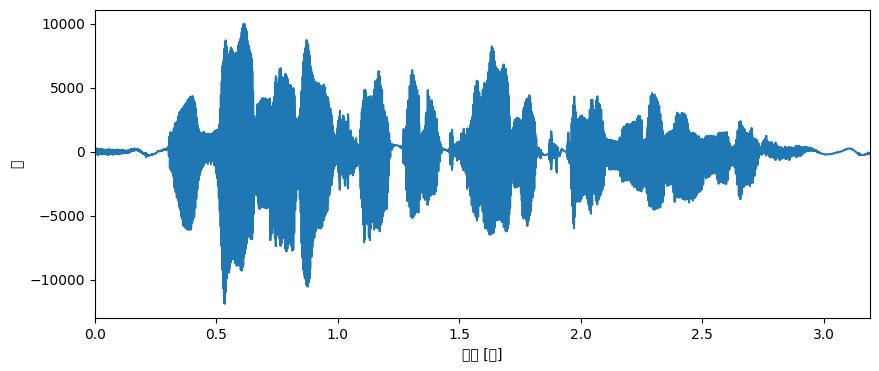

: 

In [5]:
# -*- coding: utf-8 -*-

#
# wav 파일을 열고 파형을 플로팅합니다.
#

# wav 데이터를 읽기 위한 모듈(wave)을 임포트
import wave

# 수치 연산용 모듈(numpy)을 임포트
import numpy as np

# 플로팅용 모듈(matplotlib)을 임포트
import matplotlib.pyplot as plt

#
# 메인 함수
#
if __name__ == "__main__":
    # 열 wav 파일
    wav_file = '../data/wav/BASIC5000_0001.wav'

    # 파형의 플로팅을 출력할 파일(png 파일)
    out_plot = './plot.png'

    # wav 파일을 열고 이후의 처리를 진행
    with wave.open(wav_file) as wav:
        # 샘플링 주파수 [Hz]를 가져옴
        sampling_frequency = wav.getframerate()

        # 샘플 크기 [Byte]를 가져옴
        sample_size = wav.getsampwidth()

        # 채널 수를 가져옴
        num_channels = wav.getnchannels()

        # wav 데이터의 샘플 수를 가져옴
        num_samples = wav.getnframes()

        # wav 데이터를 읽음
        waveform = wav.readframes(num_samples)
        print(waveform)
        # 읽어온 데이터는 바이너리 값(16bit 정수)이므로, 숫자(정수)로 변환
        waveform = np.frombuffer(waveform, dtype=np.int16)
        print(waveform)
    #
    # 읽어온 wav 파일의 정보를 출력
    #
    print("샘플링 주파수: %d [Hz]" % sampling_frequency)
    print("샘플 크기: %d [Byte]" % sample_size)
    print("채널 수: %d" % num_channels)
    print("샘플 수: %d" % num_samples)

    #
    # 읽어온 파형(waveform)을 플로팅
    #
    
    # x축(시간축)을 생성
    time_axis = np.arange(num_samples) / sampling_frequency

    # 플로팅의 그리기 영역을 생성
    plt.figure(figsize=(10,4))

    # 플로팅
    plt.plot(time_axis, waveform)

    # x축과 y축의 레이블을 정의
    plt.xlabel("시간 [초]")
    plt.ylabel("값")

    # x축의 표시 영역을 0부터 파형 종료 시점까지 제한
    plt.xlim([0, num_samples / sampling_frequency])

    # 플로팅을 저장
    plt.savefig(out_plot)
